In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces,load_files
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

# Load the faces datasets
data = fetch_olivetti_faces()
#data = load_files('C:\Users\GANGZ\scikit_learn_data\olivettifaces.mat')
targets = data.target

In [10]:
face_ids

array([46, 55, 69,  1, 87])

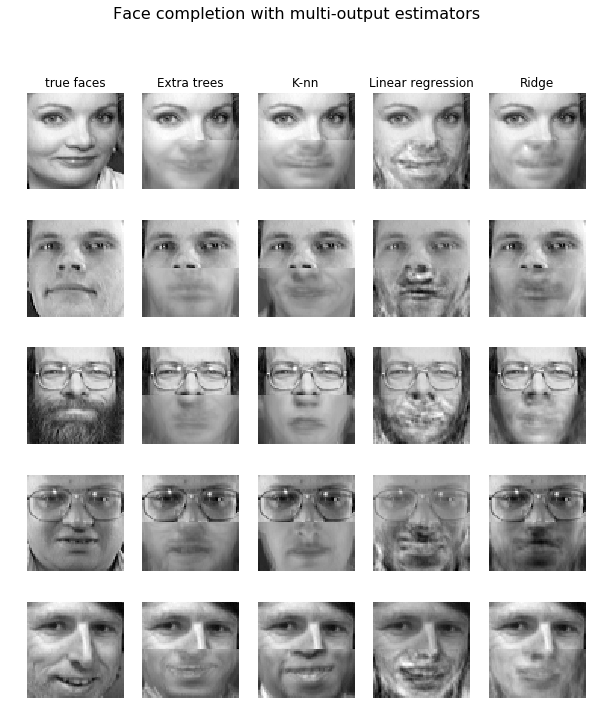

In [9]:


import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces,load_files
from sklearn.utils.validation import check_random_state

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

# Load the faces datasets
data = fetch_olivetti_faces()
#data = load_files('C:\Users\GANGZ\scikit_learn_data\olivettifaces.mat')
targets = data.target

data = data.images.reshape((len(data.images), -1))
train = data[targets < 30]
test = data[targets >= 30]  # Test on independent people

# Test on a subset of people
n_faces = 5
rng = check_random_state(4)
face_ids = rng.randint(test.shape[0], size=(n_faces, ))
test = test[face_ids, :]

n_pixels = data.shape[1]
# Upper half of the faces
X_train = train[:, :(n_pixels + 1) // 2]
# Lower half of the faces
y_train = train[:, n_pixels // 2:]
X_test = test[:, :(n_pixels + 1) // 2]
y_test = test[:, n_pixels // 2:]

# Fit estimators
ESTIMATORS = {
    "Extra trees": ExtraTreesRegressor(n_estimators=10, max_features=32,
                                       random_state=0),
    "K-nn": KNeighborsRegressor(),
    "Linear regression": LinearRegression(),
    "Ridge": RidgeCV(),
}

y_test_predict = dict()
for name, estimator in ESTIMATORS.items():
    estimator.fit(X_train, y_train)
    y_test_predict[name] = estimator.predict(X_test)

# Plot the completed faces
image_shape = (64, 64)

n_cols = 1 + len(ESTIMATORS)
plt.figure(figsize=(2. * n_cols, 2.26 * n_faces))
plt.suptitle("Face completion with multi-output estimators", size=16)

for i in range(n_faces):
    true_face = np.hstack((X_test[i], y_test[i]))

    if i:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1)
    else:
        sub = plt.subplot(n_faces, n_cols, i * n_cols + 1,
                          title="true faces")

    sub.axis("off")
    sub.imshow(true_face.reshape(image_shape),
               cmap=plt.cm.gray,
               interpolation="nearest")

    for j, est in enumerate(sorted(ESTIMATORS)):
        completed_face = np.hstack((X_test[i], y_test_predict[est][i]))

        if i:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j)

        else:
            sub = plt.subplot(n_faces, n_cols, i * n_cols + 2 + j,
                              title=est)

        sub.axis("off")
        sub.imshow(completed_face.reshape(image_shape),
                   cmap=plt.cm.gray,
                   interpolation="nearest")

plt.show()

numpy.random.randint

numpy.random.randint(low, high=None, size=None, dtype='l')
Return random integers from low (inclusive) to high (exclusive).

Return random integers from the “discrete uniform” distribution of the specified dtype in the “half-open” interval [low, high). If high is None (the default), then results are from [0, low).

Parameters:	
low : int
Lowest (signed) integer to be drawn from the distribution (unless high=None, in which case this parameter is one above the highest such integer).
high : int, optional
If provided, one above the largest (signed) integer to be drawn from the distribution (see above for behavior if high=None).
size : int or tuple of ints, optional
Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. Default is None, in which case a single value is returned.
dtype : dtype, optional
Desired dtype of the result. All dtypes are determined by their name, i.e., ‘int64’, ‘int’, etc, so byteorder is not available and a specific precision may have different C types depending on the platform. The default value is ‘np.int’.
New in version 1.11.0.
Returns:	
out : int or ndarray of ints
size-shaped array of random integers from the appropriate distribution, or a single such random int if size not provided.
See also
random.random_integers
similar to randint, only for the closed interval [low, high], and 1 is the lowest value if high is omitted. In particular, this other one is the one to use to generate uniformly distributed discrete non-integers.
Examples

>>>
>>> np.random.randint(2, size=10)
array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0])
>>> np.random.randint(1, size=10)
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
Generate a 2 x 4 array of ints between 0 and 4, inclusive:

>>>
>>> np.random.randint(5, size=(2, 4))
array([[4, 0, 2, 1],
       [3, 2, 2, 0]])